In [1]:
#pip install pandas
#!pip install scikit-learn
#!pip install plotly
#!pip install matplotlib
#!pip install seaborn

column unique values
k-prototype --->  Process,Advantages over other algos, Limitation

In [2]:
import pandas as pd
project_df = pd.read_csv('Train.csv')

In [3]:
project_df.drop(project_df.columns[[0,9,10]], inplace=True, axis=1)
project_df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,Male,No,22,No,Healthcare,1.0,Low,4.0
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0
...,...,...,...,...,...,...,...,...
8063,Male,No,22,No,NaN,0.0,Low,7.0
8064,Male,No,35,No,Executive,3.0,Low,4.0
8065,Female,No,33,Yes,Healthcare,1.0,Low,1.0
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0


In [4]:
project_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8068 non-null   object 
 1   Ever_Married     7928 non-null   object 
 2   Age              8068 non-null   int64  
 3   Graduated        7990 non-null   object 
 4   Profession       7944 non-null   object 
 5   Work_Experience  7239 non-null   float64
 6   Spending_Score   8068 non-null   object 
 7   Family_Size      7733 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 504.4+ KB


In [5]:
project_df.shape

(8068, 8)

In [6]:
project_df.columns

Index(['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size'],
      dtype='object')

In [7]:
project_df.describe()

,Age,Work_Experience,Family_Size
count,8068.000000,7239.000000,7733.000000
mean,43.466906,2.641663,2.850123
std,16.711696,3.406763,1.531413
min,18.000000,0.000000,1.000000
25%,30.000000,0.000000,2.000000
50%,40.000000,1.000000,3.000000
75%,53.000000,4.000000,4.000000
max,89.000000,14.000000,9.000000


### Data Visualization

In [8]:
import seaborn as sns

#### Gender

<AxesSubplot: xlabel='Gender', ylabel='count'>

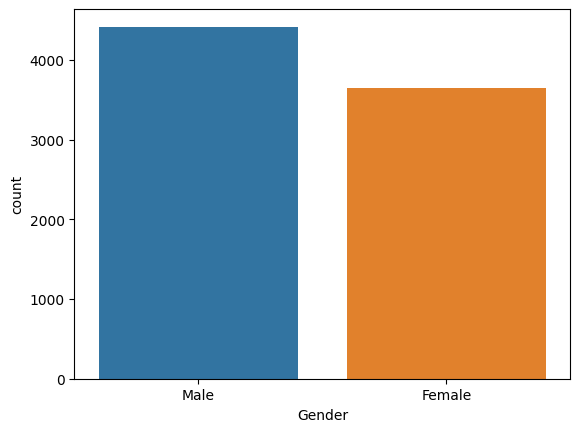

In [9]:
sns.countplot(x=project_df.Gender)

#### Ever Married

<AxesSubplot: xlabel='Ever_Married', ylabel='count'>

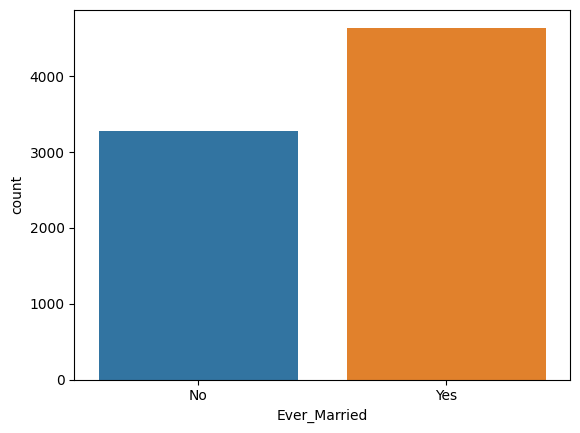

In [10]:
sns.countplot(x=project_df.Ever_Married)

#### Graduated

<AxesSubplot: xlabel='Graduated', ylabel='count'>

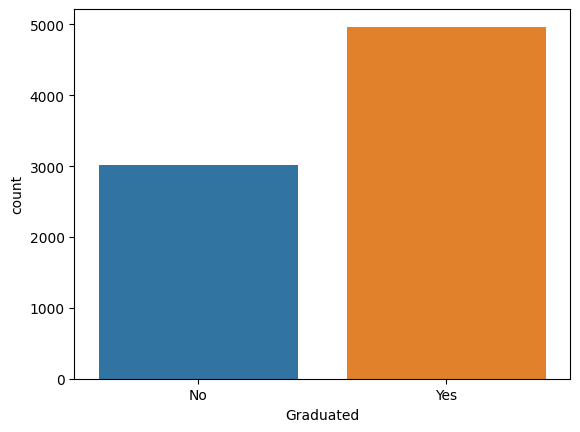

In [11]:
sns.countplot(x=project_df.Graduated)

#### Profession

<AxesSubplot: xlabel='count', ylabel='Profession'>

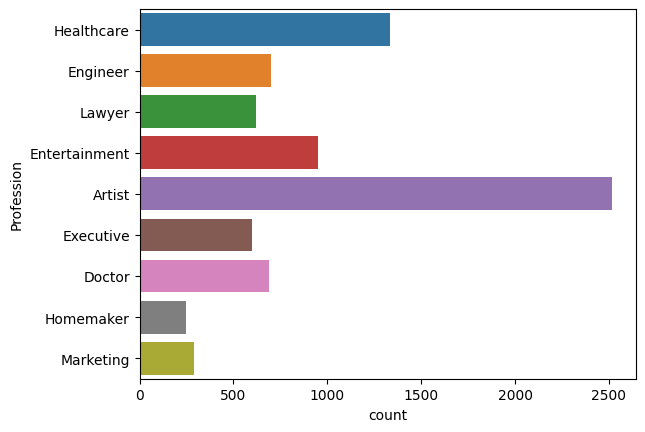

In [12]:
sns.countplot(y=project_df.Profession)

#### Work Experience

<AxesSubplot: xlabel='count', ylabel='Work_Experience'>

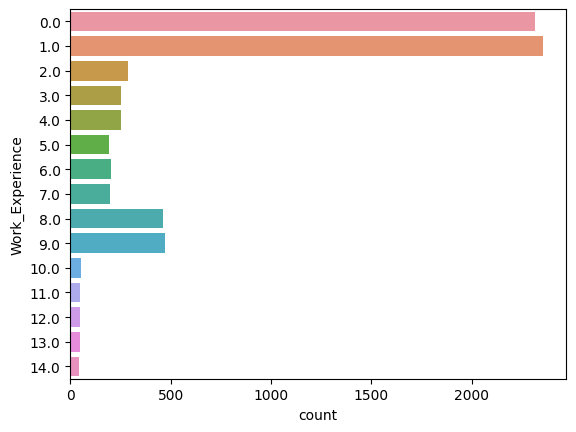

In [13]:
sns.countplot(y=project_df.Work_Experience)

#### Spending Score

<AxesSubplot: xlabel='Spending_Score', ylabel='count'>

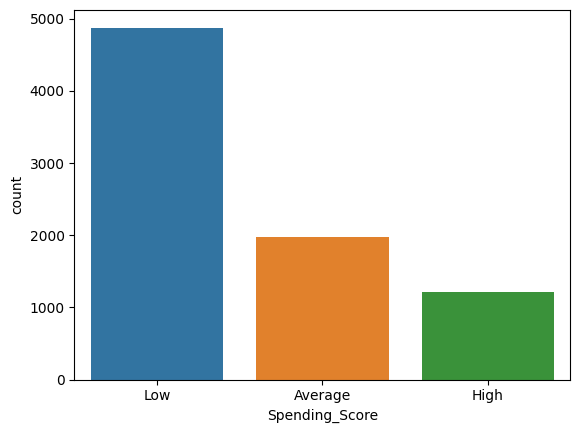

In [14]:
sns.countplot(x=project_df.Spending_Score)

#### Family_Size

<AxesSubplot: xlabel='Family_Size', ylabel='count'>

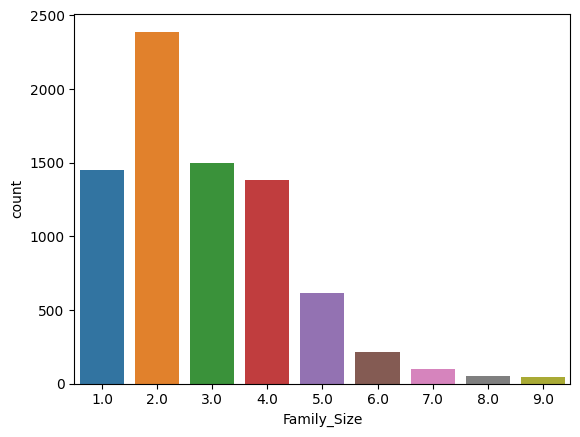

In [15]:
sns.countplot(x=project_df.Family_Size)

### Imputing Missing Numeric Data

In [16]:
numeric_cols = project_df.select_dtypes('float64').columns.tolist() + project_df.select_dtypes('int64').columns.tolist()
categorical_cols = project_df.select_dtypes('object').columns.tolist()

In [17]:
from sklearn.impute import SimpleImputer
imputer1 = SimpleImputer(strategy='most_frequent')
imputer2 = SimpleImputer(strategy='mean')

In [18]:
imputer1.fit(project_df[categorical_cols])
imputer2.fit(project_df[numeric_cols])

SimpleImputer()

In [19]:
project_df[categorical_cols] = imputer1.transform(project_df[categorical_cols])
project_df[numeric_cols] = imputer2.transform(project_df[numeric_cols])

In [20]:
project_df[numeric_cols].isna().sum()

Work_Experience    0
Family_Size        0
Age                0
dtype: int64

In [21]:
project_df[categorical_cols].isna().sum()

Gender            0
Ever_Married      0
Graduated         0
Profession        0
Spending_Score    0
dtype: int64

In [22]:
import warnings
warnings.filterwarnings("ignore")

In [23]:
import numpy as np
import matplotlib.pyplot as plt


In [24]:
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

In [25]:
# transforming categorical labels to numerical labels
df_cat = project_df[['Gender','Ever_Married','Graduated','Profession','Spending_Score']]
encoders={}
for col_name in df_cat.columns:
    series = df_cat[col_name]
    label_encoder = LabelEncoder()
    df_cat[col_name] = pd.Series(label_encoder.fit_transform(series[series.notnull()]),
    index=series[series.notnull()].index
    )
    encoders[col_name] = label_encoder

In [27]:
# Handling Missing Values using Knn for both categorical and numerical labels 
#Numerical values
df_num= project_df[['Age','Work_Experience','Family_Size']]
imputer = KNNImputer(n_neighbors=5)
df_num.loc[:]=imputer.fit_transform(df_num)
#categorical values
imputer = KNNImputer(n_neighbors=1)
df_cat.loc[:]=imputer.fit_transform(df_cat)
#concatenate the data
project_df=pd.concat([df_cat,df_num], axis=1)

In [28]:
#Load Data
pca = PCA(2)
#Transform the data
d_f= pca.fit_transform(project_df)
 
d_f.shape

(8068, 2)

In [29]:
#decode categorical data because k-prototype works with raw categorical data
for i in df_cat.columns:
     project_df[i]=project_df[i].astype(int)
for col_name in df_cat.columns:
    project_df[col_name] = encoders[col_name].inverse_transform(project_df[col_name])
    

In [30]:
project_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8068 non-null   object 
 1   Ever_Married     8068 non-null   object 
 2   Graduated        8068 non-null   object 
 3   Profession       8068 non-null   object 
 4   Spending_Score   8068 non-null   object 
 5   Age              8068 non-null   float64
 6   Work_Experience  8068 non-null   float64
 7   Family_Size      8068 non-null   float64
dtypes: float64(3), object(5)
memory usage: 504.4+ KB


In [31]:
# Get the position of categorical columns
catColumnsPos = [project_df.columns.get_loc(col) for col in list(project_df.select_dtypes('object').columns)]

print('Categorical columns           : {}'.format(list(project_df.select_dtypes('object').columns)))
print('Categorical columns position  : {}'.format(catColumnsPos))

Categorical columns           : ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score']
Categorical columns position  : [0, 1, 2, 3, 4]


In [32]:
# Converting dataframe to matrix
dfMatrix = project_df.to_numpy()

### Clustering

Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8
Cluster initiation: 9


<function matplotlib.pyplot.show(close=None, block=None)>

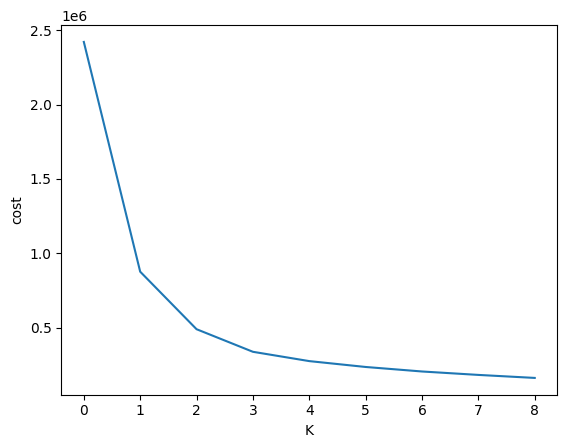

In [33]:
#Elbow method to detect number of K
from kmodes.kprototypes import KPrototypes

cost = []
for cluster in range(1, 10):
    try:
        kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 0)
        kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break

plt.plot(cost)
plt.xlabel('K')
plt.ylabel('cost')
plt.show

In [34]:
# cost : confirms visual clue of elbow plot
# KneeLocator class will detect elbows if curve is convex; if concave, will detect knees
from kneed import KneeLocator
cost_knee_c3 = KneeLocator(
        x=range(1,10), 
        y=cost, 
        S=0.1, curve="convex", direction="decreasing", online=True)

K_cost_c3 = cost_knee_c3.elbow   
print("elbow at k =", f'{K_cost_c3:.0f} clusters')

elbow at k = 3 clusters


In [35]:
#building the Kprototype model with 3 clusters
kprototype = KPrototypes(n_jobs = -1, n_clusters = 3, init = 'Huang', random_state = 0)
project_df['clusters']= kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)

### Visualizing the Clusters

In [36]:
#predicting the labels of clusters.
label = kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)
print(label)

[0 1 2 ... 0 0 1]


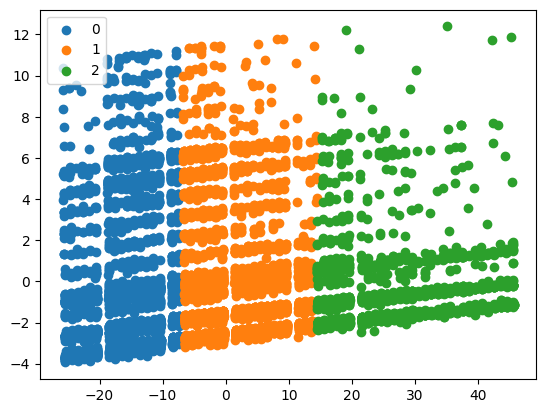

In [37]:
#Getting unique labels
u_labels = np.unique(label)
#plotting the results:
 
for i in u_labels:
    plt.scatter(d_f[label == i , 0] , d_f[label == i , 1], label = i)
plt.legend()
plt.show()

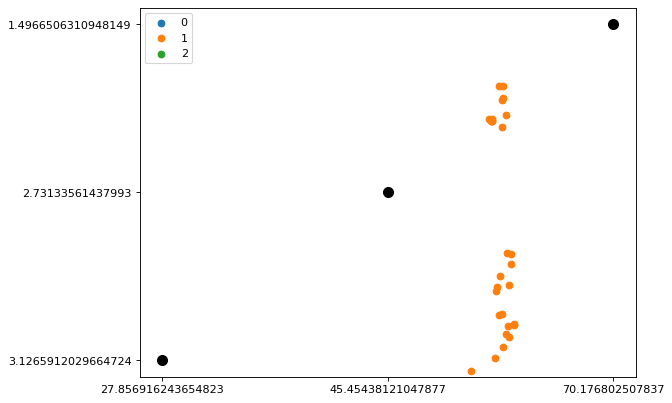

In [38]:
#Getting the Centroids of each cluster
from matplotlib.pyplot import figure

centroids = kprototype.cluster_centroids_
u_labels = np.unique(label)
figure(figsize=(8, 6), dpi=80)

#plotting the results:
 
for i in u_labels:
    plt.scatter(d_f[label == i , 0] , d_f[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

### Analysis

<AxesSubplot: >

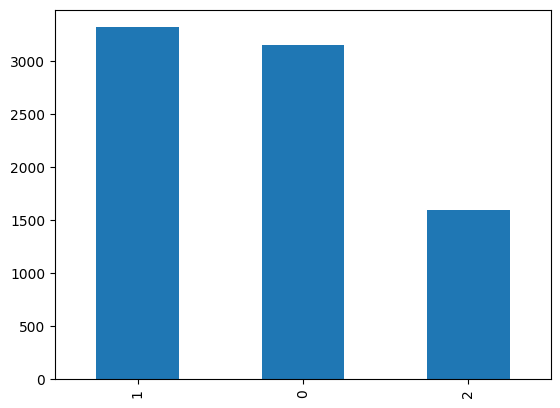

In [39]:
# volume of each cluster
project_df['clusters'].value_counts().plot(kind='bar')

In [40]:
#stats of numerical data by mean
project_df.groupby(['clusters']).mean()

,Age,Work_Experience,Family_Size
clusters,,,
0,27.856916,3.126591,3.292899
1,45.454381,2.731336,2.696978
2,70.176803,1.496651,2.293987


In [41]:
#stats of categorical data by mode
project_df.groupby(['clusters']).agg(lambda x: pd.Series.mode(x).iat[0])[['Gender','Ever_Married','Graduated','Profession','Spending_Score']]

,Gender,Ever_Married,Graduated,Profession,Spending_Score
clusters,,,,,
0,Male,No,No,Healthcare,Low
1,Male,Yes,Yes,Artist,Low
2,Male,Yes,Yes,Lawyer,Low
